<a href="https://colab.research.google.com/github/kalai2315/Marketing_Analysis/blob/main/Bank_Marketing__Campaign__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Overview:**
 The dataset contains information about a marketing campaign carried out by a Portuguese banking institution. The marketing campaigns were based on phone calls. The objective is to identify patterns and insights that can help improve future marketing strategies.

**Objectives:**
The goal of this case study is to perform a comprehensive analysis of the dataset using Python, SQL, and Power BI, with a focus on statistical analysis, machine learning, and advanced database queries and visualizations

**Dataset Link:** https://drive.google.com/file/d/1RXd7kM4dqfblxBUQBxHORyeSD9qTABd9/view?usp=drive_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Bank_Dataset.csv')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,blue-collar,married,secondary,no,723,yes,yes,unknown,5,may,262,1,-1,0,unknown,no
1,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
3,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,266,1,-1,0,unknown,no
4,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,technician,single,secondary,no,2583,no,no,cellular,25,may,241,1,108,1,failure,no
45207,31,admin.,single,secondary,no,8626,no,no,cellular,25,may,159,1,111,1,failure,no
45208,28,technician,single,secondary,no,6551,no,no,cellular,26,may,362,1,77,1,failure,no
45209,36,admin.,married,secondary,no,953,yes,no,cellular,28,may,77,1,100,1,failure,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['job'].value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [ ]:
#Standardize columns: Ensure all categorical data is standardized (e.g., consistent capitalization, removing leading/trailing spaces).
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip().str.lower())

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,blue-collar,married,secondary,no,723,yes,yes,unknown,5,may,262,1,-1,0,unknown,no
1,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
3,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,266,1,-1,0,unknown,no
4,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no


In [ ]:
#- Perform encoding for y column(categorical)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['y'] = encoder.fit_transform(df['y'])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,blue-collar,married,secondary,no,723,yes,yes,unknown,5,may,262,1,-1,0,unknown,0
1,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,0
3,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,266,1,-1,0,unknown,0
4,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,0


In [ ]:
df['y'].value_counts()

,count
y,
0,39922
1,5289


# **Exploratory Data Analysis (EDA)**

**Demographic Analysis:**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

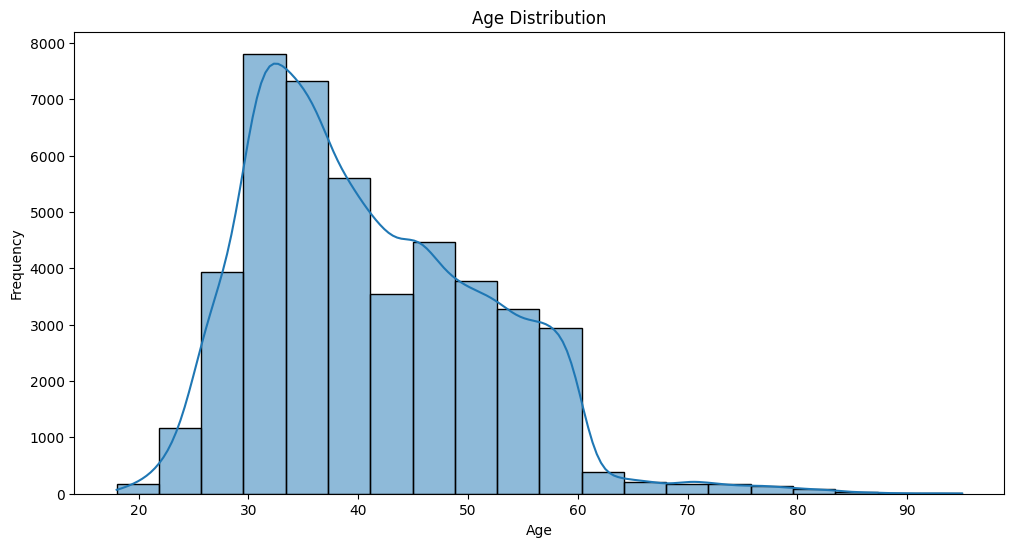

In [ ]:
#Analyze the age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt

The age distribution appears skewed slightly towards younger ages, with a peak around the late 20s to early 30s.

<ipython-input-26-9d1c3430acd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job', y='age', data=df, palette='Set2')


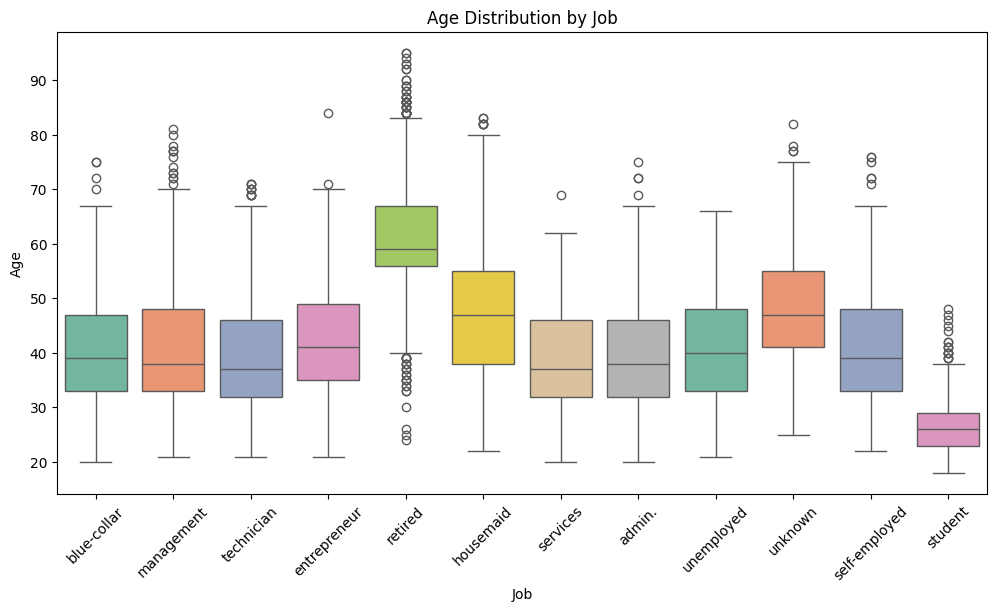

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Certain jobs like "management" and "technician" show a wider age range.

Roles such as "student" are concentrated in younger age groups.

<ipython-input-28-92e5dc2bee6b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marital', y='age', data=df, palette='Set2')


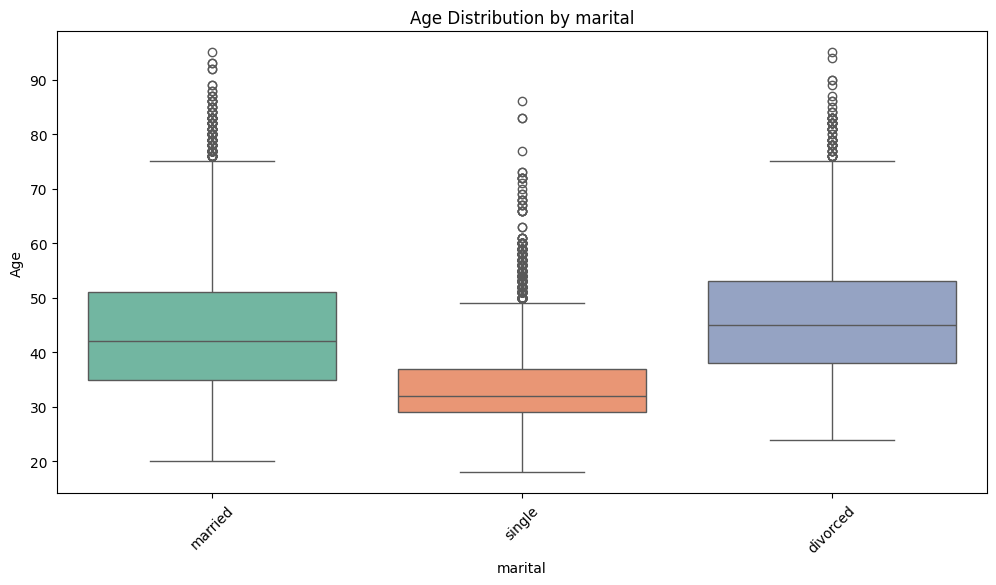

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='marital', y='age', data=df, palette='Set2')
plt.title('Age Distribution by marital')
plt.xlabel('marital')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Age by Marital Status:

Married individuals are predominantly older, while single individuals are mostly in younger age brackets.

<ipython-input-29-351b8e136209>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='age', data=df, palette='Set2')


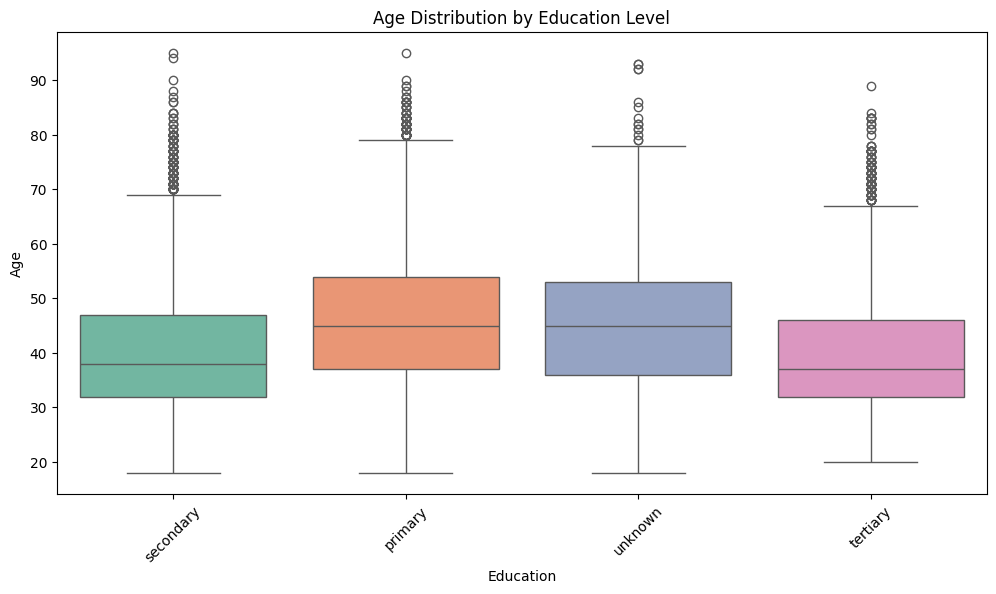

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='education', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Individuals with tertiary education span a broader age range compared to those with primary or secondary education.

In [ ]:
#contingency table
contingency_table = pd.crosstab(df['housing'], df['loan'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
loan        no   yes
housing             
no       17204  2877
yes      20763  4367


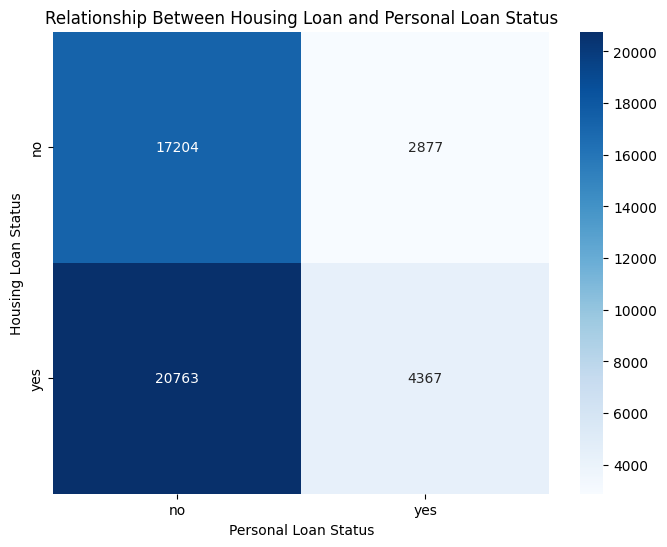

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship Between Housing Loan and Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Housing Loan Status')
plt.show()

**Loan Analysis Results:**

Shows the distribution of housing and loan statuses:

People with no housing loan: 17,204 without personal loans, 2,877 with personal loans.

People with a housing loan: 20,763 without personal loans, 4,367 with personal loans.

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)



Chi-Square Test Results:
Chi2 Statistic: 76.97480834381858
P-value: 1.7315256945310098e-18
Degrees of Freedom: 1
Expected Frequencies:
[[16863.49178297  3217.50821703]
 [21103.50821703  4026.49178297]]


In [ ]:
# Interpretation
if p < 0.05:
    print("\nThere is a significant relationship between Housing Loan and Personal Loan statuses.")
else:
    print("\nThere is no significant relationship between Housing Loan and Personal Loan statuses.")


There is a significant relationship between Housing Loan and Personal Loan statuses.


**Campaign Analysis:**

In [ ]:
df['campaign'].value_counts()

,count
campaign,
1,17544
2,12505
3,5521
4,3522
5,1764
6,1291
7,735
8,540
9,327


In [ ]:
# Analyze success rate for clients with campaign = 1
campaign_1 = df[df['campaign'] == 1]
success_rate_campaign_1 = campaign_1['y'].mean() * 100

print("\nSuccess Rate for Clients Contacted Once (campaign = 1):")
print(f"Success Rate: {success_rate_campaign_1:.2f}%")


Success Rate for Clients Contacted Once (campaign = 1):
Success Rate: 14.60%


Text(0.5, 0, 'Number of Contacts')

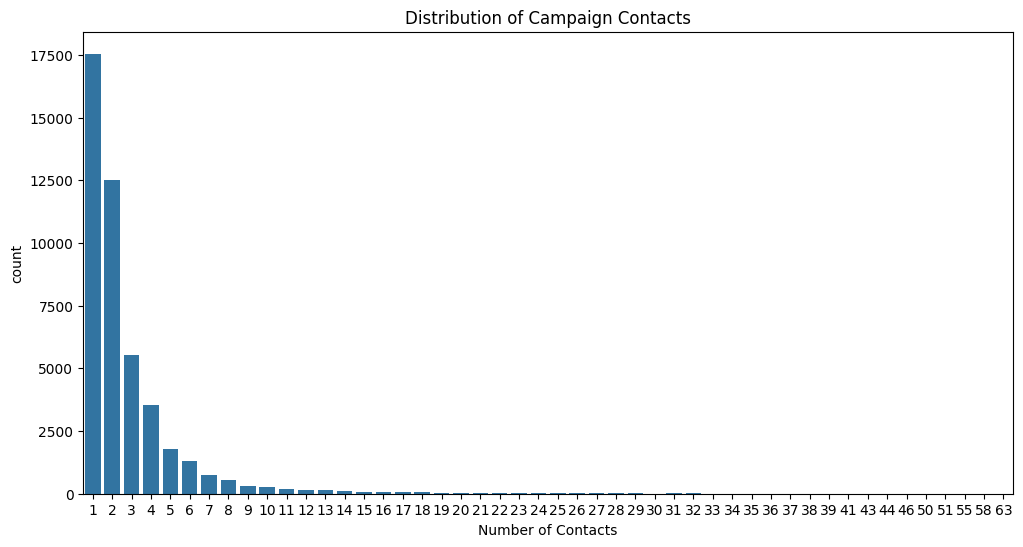

In [ ]:
#Examine the distribution of campaign contacts and their success rate.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='campaign')
plt.title('Distribution of Campaign Contacts')
plt.xlabel('Number of Contacts')

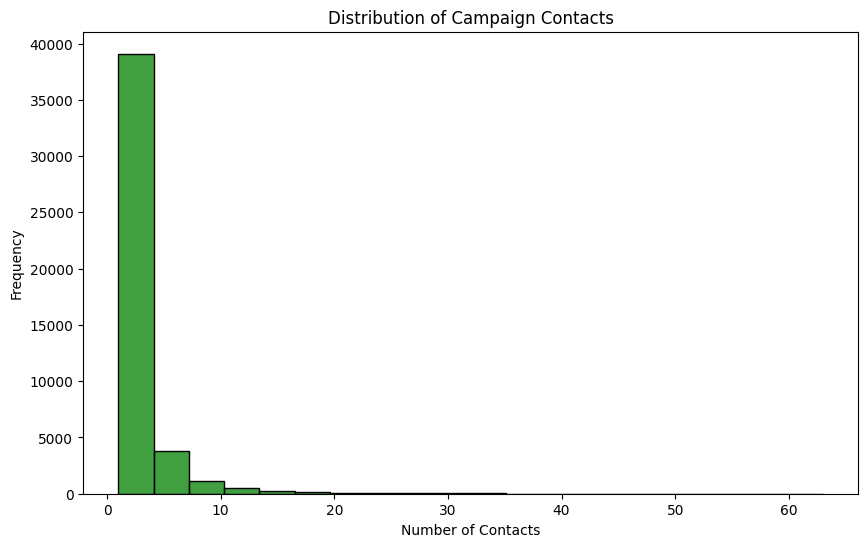

In [ ]:
#Distribution of campaign contacts
plt.figure(figsize=(10, 6))
sns.histplot(df['campaign'], kde=False, bins=20, color='green')
plt.title('Distribution of Campaign Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Calculate success rate of campaigns
campaign_success = df.groupby('campaign')['y'].value_counts(normalize=True).unstack().fillna(0) * 100

print("Campaign Success Rate (%):\n", campaign_success)

Campaign Success Rate (%):
 y                  0          1
campaign                       
1          85.402417  14.597583
2          88.796481  11.203519
3          88.806376  11.193624
4          90.999432   9.000568
5          92.120181   7.879819
6          92.873741   7.126259
7          93.605442   6.394558
8          94.074074   5.925926
9          93.577982   6.422018
10         94.736842   5.263158
11         92.039801   7.960199
12         97.419355   2.580645
13         95.488722   4.511278
14         95.698925   4.301075
15         95.238095   4.761905
16         97.468354   2.531646
17         91.304348   8.695652
18        100.000000   0.000000
19        100.000000   0.000000
20         97.674419   2.325581
21         97.142857   2.857143
22        100.000000   0.000000
23        100.000000   0.000000
24         95.000000   5.000000
25        100.000000   0.000000
26        100.000000   0.000000
27        100.000000   0.000000
28        100.000000   0.000000
29         9

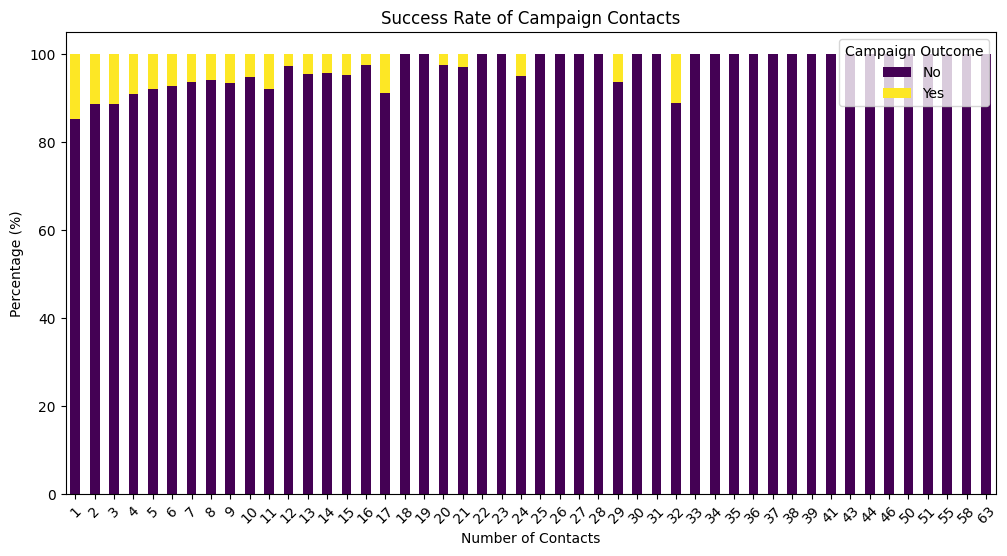

In [ ]:
#Visualize success rate
campaign_success.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Success Rate of Campaign Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Percentage (%)')
plt.legend(title='Campaign Outcome', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

**Trend:**

For most numbers of contacts, the purple section dominates, indicating that unsuccessful outcomes (No) are more frequent than successful outcomes (Yes).

The yellow section (successful outcomes) is relatively small across the bars, suggesting a lower success rate even with multiple contacts.

# **Statistical Analysis**

**Hypothesis Testing:** Conduct hypothesis testing to determine if there is a significant difference in balance between clients with and without a housing loan.

In [ ]:
# Hypothesis Testing: Compare balance for clients with and without a housing loan
housing_yes = df[df['housing'] == 'yes']['balance']
housing_no = df[df['housing'] == 'no']['balance']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Perform an independent t-test
t_stat, p_value = ttest_ind(housing_yes, housing_no, equal_var=False)

In [ ]:
print("Hypothesis Testing Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

Hypothesis Testing Results:
t-statistic: -14.081117553694206
p-value: 6.625425926072512e-45


**Interpretation:**
The p-value is extremely small (less than 0.05), indicating a statistically significant difference in account balances between clients with and without a housing loan. Therefore, we reject the null hypothesis and conclude that the balance differs significantly between these two groups.

In [ ]:
# Select relevant columns for correlation analysis
correlation_variables = ['duration', 'campaign', 'y']
correlation_matrix = df[correlation_variables].corr()

In [ ]:
# Extract the correlation of 'y' with other variables
correlation_with_success = correlation_matrix['y']

print("\nCorrelation Analysis Results:")
print(correlation_with_success)


Correlation Analysis Results:
duration    0.394521
campaign   -0.073172
y           1.000000
Name: y, dtype: float64


<ipython-input-48-c09c9dca717c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_success.index, y=correlation_with_success.values, palette='viridis')


Text(0.5, 1.0, 'Correlation Analysis with Success')

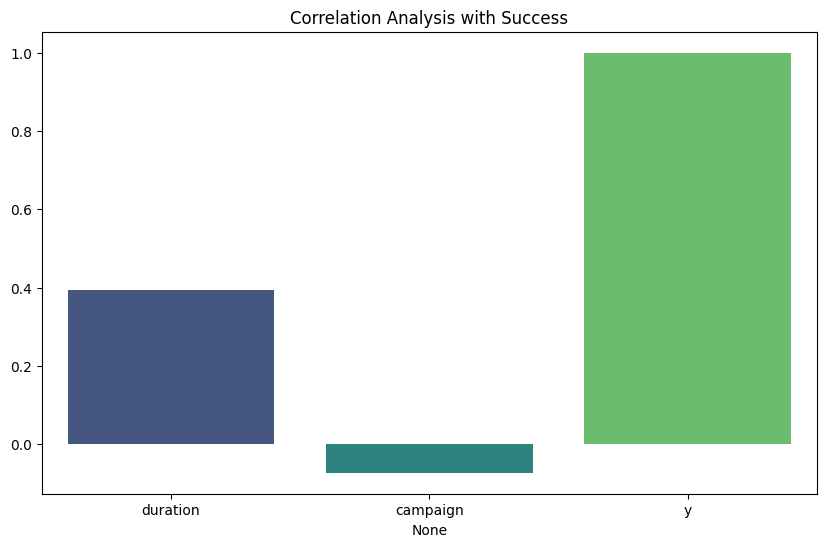

In [ ]:
#visualise the correlation_with_success
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_success.index, y=correlation_with_success.values, palette='viridis')
plt.title('Correlation Analysis with Success')


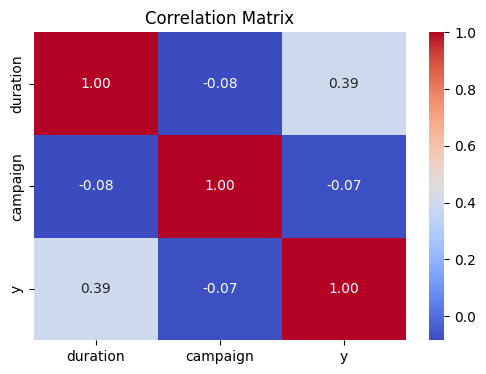

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()


**Correlation of Variables:**

duration and y: Moderate positive correlation (r≈0.39). This indicates that longer call durations are associated with a higher success rate for term deposit subscriptions.

campaign and y: Weak negative correlation (r≈-0.07). This suggests that a higher number of contacts slightly reduces the likelihood of success, potentially due to over-contacting or customer fatigue.

duration and campaign: Likely a very weak or negligible correlation, depending on the exact value from the heatmap.

# **Machine Learning**

Model Building Using Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(columns=['y'])  # Feature columns
y = df['y']  # Target column

In [ ]:
# Convert categorical variables to numeric(one hot encoding)
X = pd.get_dummies(X)

In [ ]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Build the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # assuming "yes" is the positive class
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.90
Precision: 0.62
Recall: 0.36
F1 Score: 0.45
Confusion Matrix:
[[7788  226]
 [ 660  369]]


Recall is relatively low (36%), which indicates the model is missing a significant portion of the actual positive cases.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Build the Random Forest model
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred1 = model1.predict(X_test)

In [ ]:
# Evaluate the model using various metrics
accuracy_r = accuracy_score(y_test, y_pred1)
precision_r = precision_score(y_test, y_pred1)
recall_r = recall_score(y_test, y_pred1)
f1_r = f1_score(y_test, y_pred1)
conf_matrix_r = confusion_matrix(y_test, y_pred1)

In [ ]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy_r:.2f}")
print(f"Precision: {precision_r:.2f}")
print(f"Recall: {recall_r:.2f}")
print(f"F1 Score: {f1_r:.2f}")
print("Confusion Matrix:")
print(conf_matrix_r)

Accuracy: 0.91
Precision: 0.62
Recall: 0.43
F1 Score: 0.51
Confusion Matrix:
[[7750  264]
 [ 590  439]]


**Conclusion:**

The model is failing to identify a significant portion of the minority class (positive class), as evidenced by the relatively low recall (43%).

The high accuracy is misleading because of the class imbalance. The model likely predicts the majority class most of the time and only occasionally predicts the minority class.

Precision is decent but still leaves room for improvement in reducing false positives.

The F1 score is relatively low, indicating that the model is not performing optimally in balancing precision and recall.

**Recommendations:**

Resampling:
Use oversampling (e.g., SMOTE) or undersampling techniques to balance the dataset and reduce class imbalance.